In [25]:
import sys
sys.path.append('/home/jp/Documents/GitProjects/faas-sim')
from typing import List

import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
import numpy as np
import pickle
import datetime as dt
import matplotlib.dates as md
from matplotlib import ticker
import re

from ext.jjnp21.automator.experiment import Result
from ext.jjnp21.automator.analyzer import BasicResultAnalyzer



def load_results(path) -> List[Result]:
    with open(path, 'rb') as f:
        results = pickle.load(f)
        return results

In [32]:
duration = 2000

def mapping_fn(shift, now):
    wavelength = duration / 2.8
    if now < shift or now > shift + wavelength:
        return 0
    else:
        return np.sin(now * np.pi / wavelength)

def build_region_weight_mapping(region_list: List[str]) -> Dict[str, Any]:
    mappings = {}
    for index, region in enumerate(region_list):
        mappings[region] = partial(mapping_fn, index * duration / 2.4)
    return mappings

f1 = build_region_weight_mapping(['1', '2' '3'])

wavelength = 1 / 2
x = np.arange(0,duration,0.1)   # start,stop,step
y = np.sin(x * get_wavelength_modifier(12))
plt.plot(x, y)
plt.show()


NameError: name 'Dict' is not defined

In [116]:
results = load_results('/home/jp/Documents/tmp/region_shift2.dump')

In [50]:
analyzer = BasicResultAnalyzer(results)
analysis = analyzer.basic_kpis()
analysis

,name,E2E mean,E2E q50,E2E q75,E2E q90,E2E q99,FET mean,FET q50,FET q75,FET q90,...,tx_time_lb_fx mean,tx_time_lb_fx q50,tx_time_lb_fx q75,tx_time_lb_fx q90,tx_time_lb_fx q99,cl_fx_cross_city,cl_lb_fx_cross_city,nodes_by_type,total_rq_by_type,avg_rq_by_type
0,25rps_2000s_global_osmotic pthres=0.02 hyst=0.2,0.5810,0.4434,0.8996,1.1534,1.7275,0.0301,0.0171,0.0269,0.0864,...,0.1119,0.0110,0.1481,0.2721,0.8472,0.599603,0.150831,"{'rpi3': 8, 'rpi4': 9, 'tx2': 19, 'nuc': 10, '...","{'rpi3': 4113, 'rpi4': 6486, 'tx2': 19745, 'nu...","{'rpi3': 514.125, 'rpi4': 720.6666666666666, '..."
1,25rps_2000s_global_osmotic pthres=0.05 hyst=0.08,0.5821,0.4480,0.9026,1.1522,1.7311,0.0315,0.0170,0.0269,0.0954,...,0.1117,0.0111,0.1270,0.2725,0.8427,0.599692,0.144663,"{'rpi3': 10, 'rpi4': 10, 'tx2': 18, 'nuc': 12,...","{'rpi3': 5118, 'rpi4': 7713, 'tx2': 15723, 'nu...","{'rpi3': 511.8, 'rpi4': 771.3, 'tx2': 873.5, '..."


In [121]:
results[0].lb_replica_count_by_city

,newyork,london,sydney
time,,,
2022-03-13 14:26:59.158679,0,1,0
2022-03-13 14:27:14.156291,1,1,0
2022-03-13 14:27:29.156288,2,1,0
2022-03-13 14:27:44.156712,3,1,0
2022-03-13 14:30:44.156520,4,1,0
2022-03-13 14:40:14.156529,4,2,0
2022-03-13 14:40:44.156519,4,3,0
2022-03-13 14:40:59.156583,4,4,0
2022-03-13 14:41:59.156581,4,5,0


No handles with labels found to put in legend.


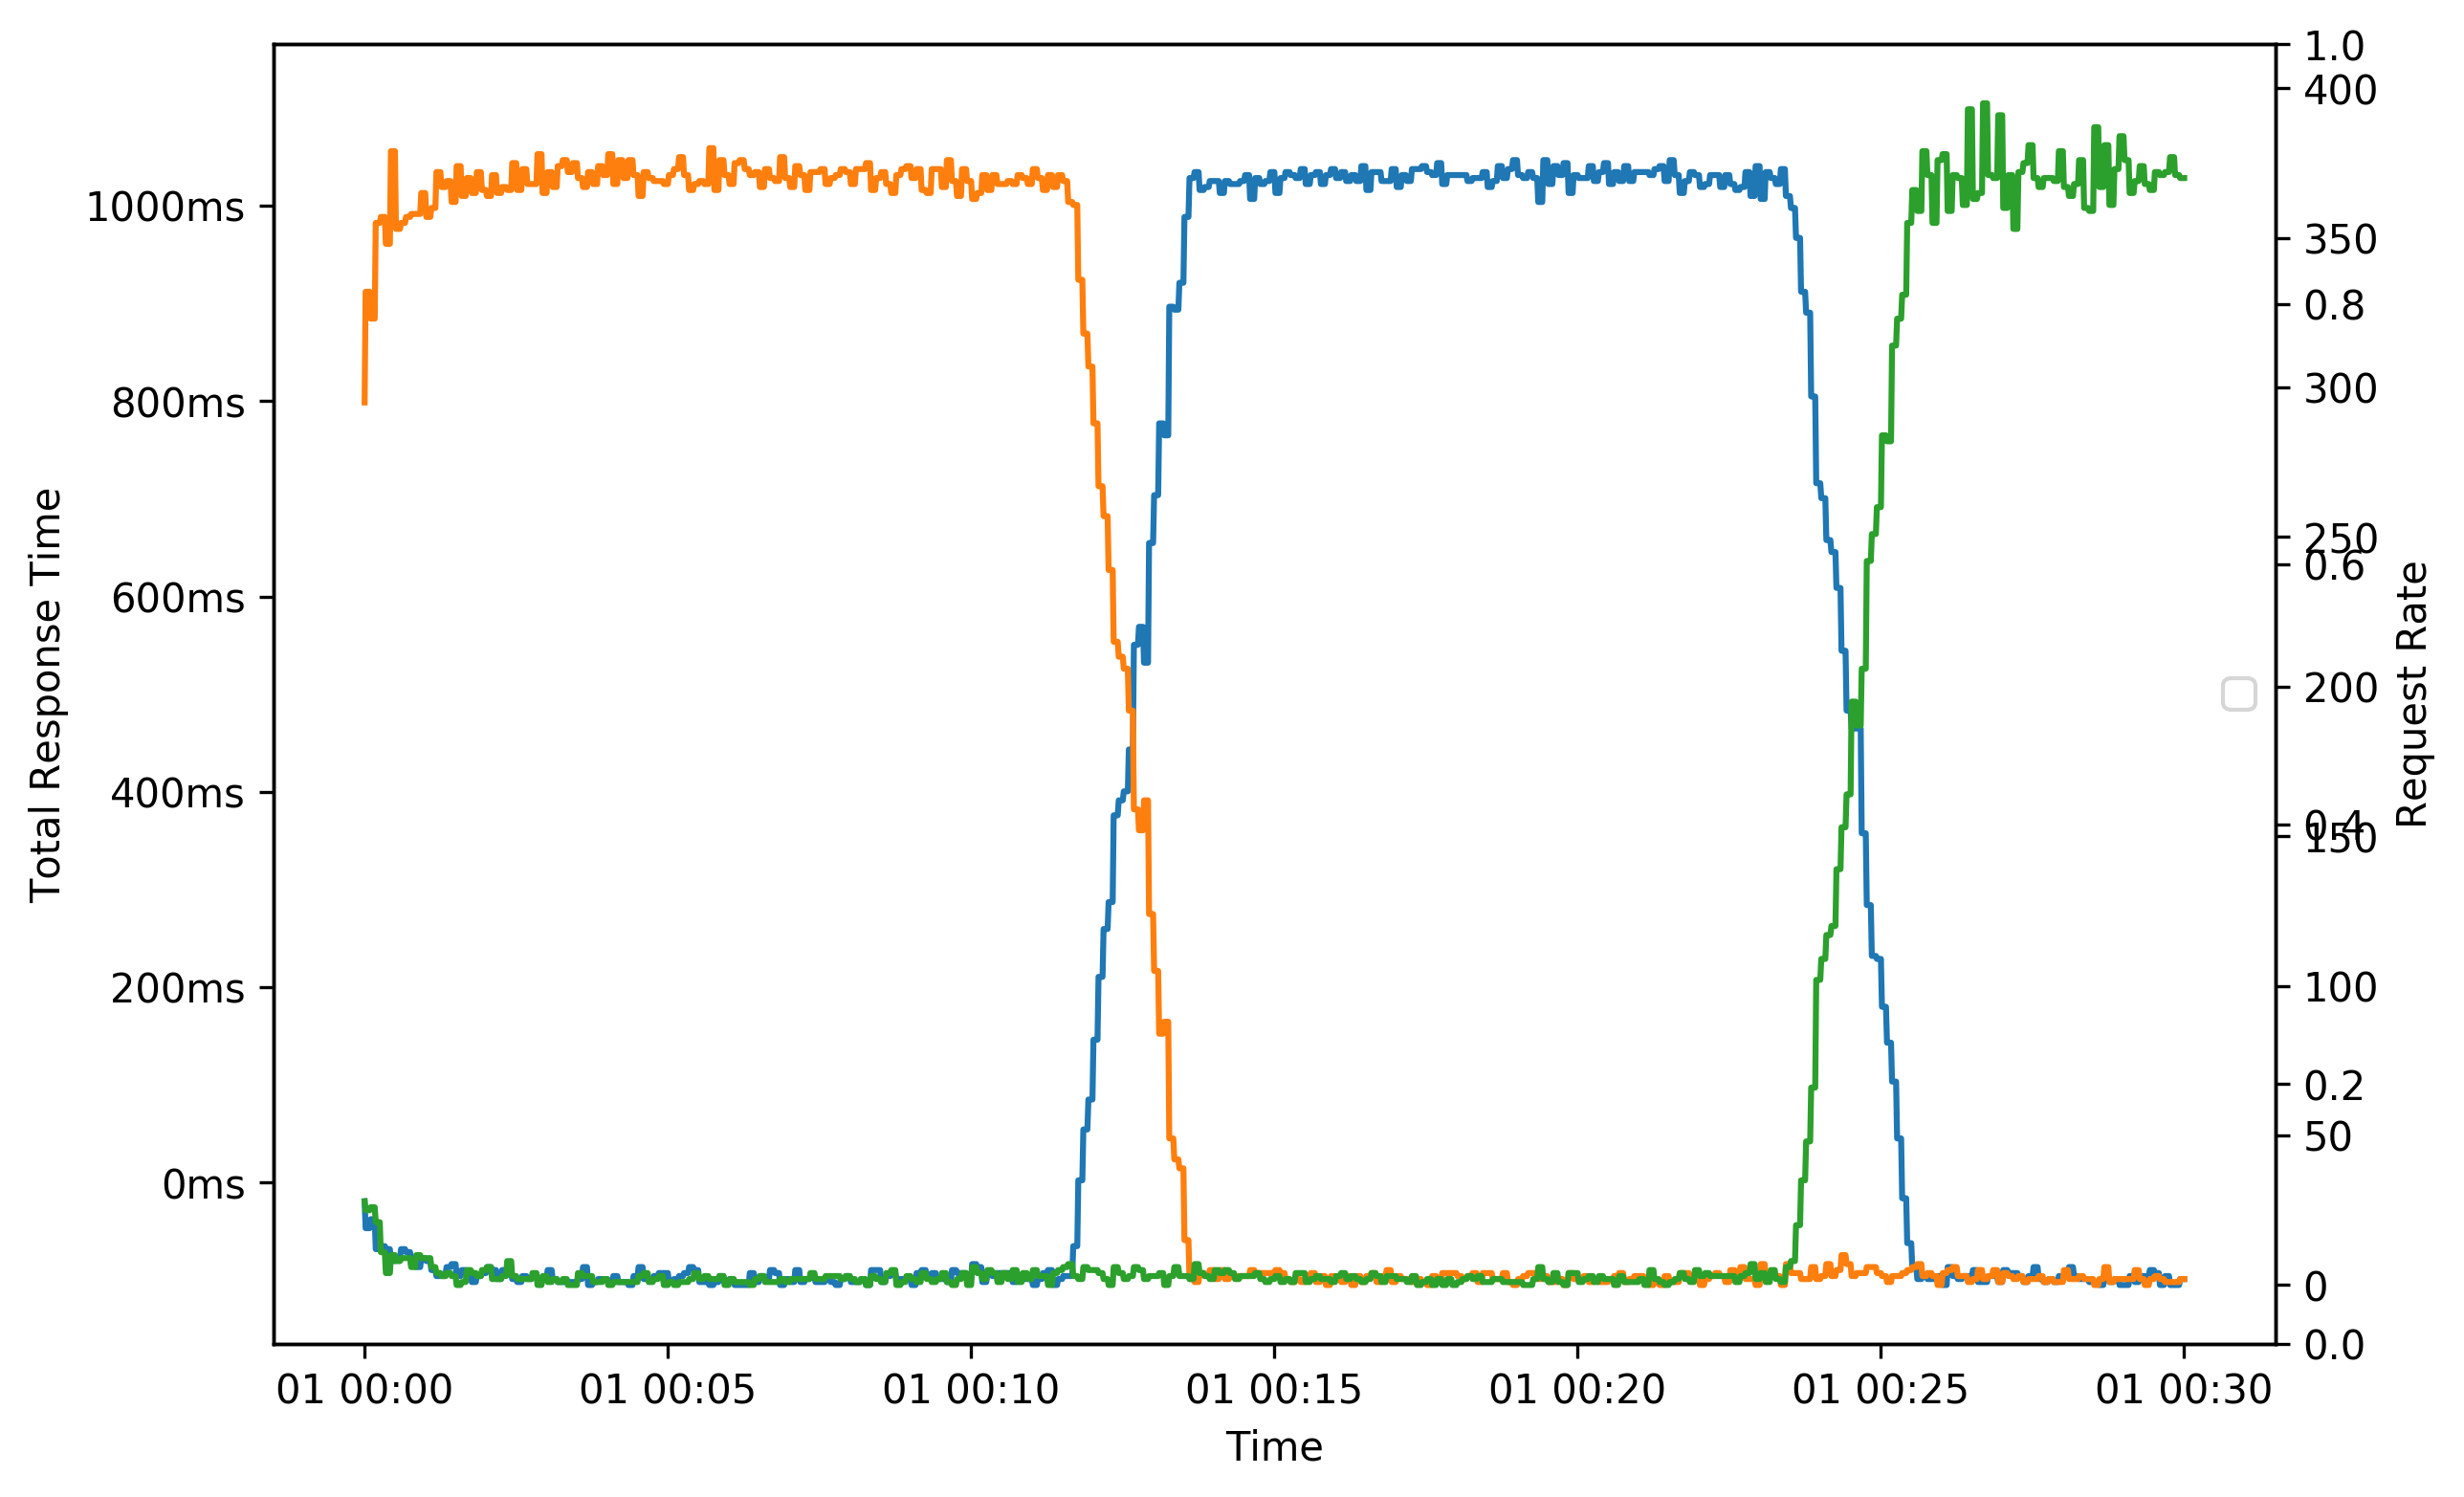

In [124]:
def plot(ax, r):
    timebase = dt.datetime(1970,1,1)
    
    xfmt = md.DateFormatter('%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    t_index = pd.DatetimeIndex(pd.date_range(start=dt.datetime(1970,1,1,0,0,0), end=dt.datetime(1970,1,1,0,30,0), freq="1s"))
    
    
    @ticker.FuncFormatter
    def ms_formatter(x, pos):
        return f'{str(int(x * 1000))}ms'
    
    @ticker.FuncFormatter
    def replica_formatter(x, pos):
        return f'{str(int(x))}'
    
    ax.yaxis.set_major_formatter(ms_formatter)
    ax2 = ax.twinx()
    ax2.yaxis.set_major_formatter(replica_formatter)
    colors = ['orange', 'blue']

    inv = r.invocations
    sc = r.lb_replica_count
    delta = inv.iloc[0].name - timebase
    delta_sc = sc.iloc[0].name - timebase
    name = f'Upscaling Threshold: {r.experiment.name[34:38]}'
    
    london = inv[inv['client_city'] == 'london'].shift(freq=-delta)
    ax2.plot(london['client_city'].resample('5s').count().reindex(t_index).fillna(method='bfill').fillna(method='ffill'))
    newyork = inv[inv['client_city'] == 'newyork']
    ax2.plot(newyork.shift(freq=-delta)['client_city'].resample('5s').count().reindex(t_index).fillna(method='bfill').fillna(method='ffill'))
    sydney = inv[inv['client_city'] == 'sydney']
    ax2.plot(sydney.shift(freq=-delta)['client_city'].resample('5s').count().reindex(t_index).fillna(method='bfill').fillna(method='ffill'))
    
    ax3 = ax.twinx()
    for city in ['london', 'newyork', 'sydney']:
        ax.plot(r.lb_replica_count_by_city[city].resample('1s').sum().reindex(t_index).fillna(method='ffill'))
    
    
#     ax.plot(inv.shift(freq=-delta)['tx_time_cl_lb'].resample('10s').mean(), label=name, linestyle='dashed')
#     ax.plot(inv.shift(freq=-delta)['t_exec'].resample('60s').mean(), label=name, linestyle='dashed')
    
    fets = r.fets
#     ax.plot(fets.shift(freq=-delta)['t_fet'].resample('30s').mean(), label=name, linestyle='dashed')
#     ax2.plot(sc.shift(freq=-delta_sc)['running_lb_replicas'].resample('1s').pad().reindex(t_index).fillna(method='pad'), label=name)
    
    ax2.legend(loc='right')
    ax.set_xlabel('Time')
    ax.set_ylabel('Total Response Time')
    ax2.set_ylabel('Request Rate')


fix, ax = plt.subplots(1, 1, figsize=(9,6), dpi=300)
plot(ax, results[2])

In [46]:
results[0].lb_replica_deploy

,lb,node,topology_type
time,,,
2022-03-12 23:40:48.121979,traefik-lrt,xeoncpu_0,cloud
